# Exercise 2.4: Oja’s Rule: Application

The file data-onlinePCA.txt contains observations from an artificial experiment run over
an interval of time (i.e. the first datapoint was observed at t0 = 0 and the last at tT = 10s).

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
data = pd.read_csv('data-onlinePCA.txt', delimiter = ",")
del data[data.columns[0]]
data

,V1,V2
0,-0.009734,0.224493
1,0.046447,1.577675
2,-0.095613,-0.443073
3,0.068041,-0.927732
4,-0.301380,1.868439
...,...,...
1995,0.370809,-0.398580
1996,-0.163260,0.156189
1997,0.358471,0.053041
1998,0.067959,-0.307401


### Part (a) 
Produce a scatter plot of the data and indicate the time index by the color of the datapoints.
You can break the full dataset into 10 blocks corresponding to 1 second length each and use
10 different colors, 1 color for each block..

<img src="ex2.4(a).jpeg">

In [13]:
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

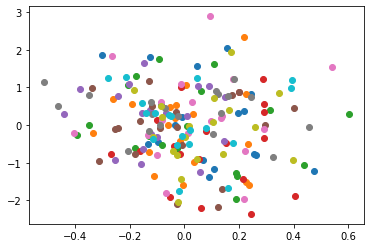

In [18]:
for i in range(10):
    index_start = 20*i
    index_end = 20*i+19
    plt.scatter(data['V1'][index_start:index_end],data['V2'][index_start:index_end],color = colors[i])

### Part (b) 
Determine the principal components (using batch PCA) for each of the 10 blocks separately.


Plot the first PC for each block (e.g. as an arrow or the endpoint of it) together with the original data.

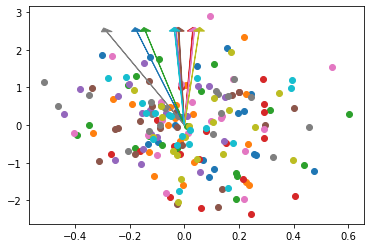

In [75]:
for i in range(10):
    index_start = 20*i
    index_end = 20*i+19
    df = data[index_start:index_end]
    df = df-df.mean()
    df_cov = df.cov()
    eigen_val, eigen_vec = np.linalg.eigh(df_cov)
    ind = np.where(eigen_val == eigen_val.max())[0][0]
    plt.grid()
    plt.arrow(0,0,eigen_vec[ind][0]*2.5,eigen_vec[ind][1]*2.5,head_width=0.04, head_length=.1, fc=colors[i], ec=colors[i])
    plt.scatter(data['V1'][index_start:index_end],data['V2'][index_start:index_end],color = colors[i]) 

### Part (c) 

Implement Oja’s rule and apply it with a learning rate parameter \epsilon \in {0.002,0.04,0.45} the dataset. In each iteration, take the next3 data point and apply the learning step. Plot the
weights at each timestep (as points whose x vs. y coordinates are given by the weight for x
and y) in the same plot as the original data (use the colors from (a) to indicate the time index
for each plotted weight).
Interpret your results.
Total